# 計算情緒分數

首先讀取Reuters、台灣經濟日報（資料經過翻譯，見translation檔）以及BBC新聞資料

In [2]:
import pickle
import pandas as pd

In [3]:
with open('Reuters_news.pickle', 'rb') as file:
    news_data = pickle.load(file)

news_datafr = pd.DataFrame(news_data)[['date', 'title', 'summary', 'content']]
news_datafr.head()

,date,title,summary,content
0,2018-09-18 08:24:00,China will use trade war with US to replace im...,"... measures"" the United States is taking in t...","SHANGHAI, Sept 19 (Reuters) - China is not afr..."
1,2019-05-13 04:28:00,US STOCKS-Wall St shudders as U.S.-China trade...,"... belligerent\ntrade war, sending investors ...",NEW YORK (Reuters) - Wall Street sank on Monda...
2,2019-05-13 02:38:00,US STOCKS-Wall St dives as U.S.-China trade wa...,.../ in a news window)\n* China to impose tari...,"(For a live blog on the U.S. stock market, cli..."
3,2018-10-12 04:02:00,Lenders brace for trade war,"...-China trade war intensifies, dealing a\nfu...",* Loans: Business from China to take further h...
4,2018-09-07 03:07:00,"Australian, NZ shares fall on worries US-China...","..., partly because of the\npossibility the U....",* Australian shares have worst week since Febr...


In [4]:
with open('money_news.pickle', 'rb') as file:
    news_data = pickle.load(file)

Mnews_datafr = pd.DataFrame(news_data)[['date', 'title', 'summary']]

In [5]:
with open('bbc_tradewar.bin', 'rb') as file:
    bbc_data = pickle.load(file)

bbc_datafr = pd.DataFrame(bbc_data)[['time', 'title', 'summary', 'doc']]
bbc_datafr.columns = ['date', 'title', 'summary', 'content']

讀取經過處理的字串（見wrds_processing檔）

In [ ]:
with open('RNews_wrds.pickle', 'rb') as file:
    reuters_filtered_lst = pickle.load(file)

In [5]:
with open('Money_wrds.pickle', 'rb') as file:
    money_filtered_lst = pickle.load(file)

In [6]:
with open('BBC_wrds.pickle', 'rb') as file:
    bbc_filtered_lst = pickle.load(file)

計算情緒分數，依照單詞 >> 句子 >> 新聞順序進行

In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [10]:
def sentiment_analyzer_scores(words):
    score = analyser.polarity_scores(words)
    return words, score

def total_scores(score_lst): #arg : a list of many dict
    scores_lst = []
    neg = 0
    neu = 0
    pos = 0
    compound = 0
    for i in range(len(score_lst)):
        neg += score_lst[i]['neg']
        neu += score_lst[i]['neu']
        pos += score_lst[i]['pos']
        compound += score_lst[i]['compound']
    scores_lst.append({
        'neg' : neg,
        'neu' : neu,
        'pos' : pos,
        'compound' : compound
    })
    
    return scores_lst

In [11]:
reuters_total_score_lst = []
for i in range(len(reuters_filtered_lst)): # len(filtered_lst) = 636, numbers of news = 636
    #print(i)
    news_score = []
    for j in range(len(reuters_filtered_lst[i])):
        #print(j, len(filtered_lst[i]))
        sent_score = []
        for wrds in reuters_filtered_lst[i][j]:
            scores = sentiment_analyzer_scores(wrds)
            #print('wrds:', scores)
            sent_score.append(scores[1]) #一則新聞的一句單詞分數
        #print('sent:', sent_score)
        sent_ttl_score = total_scores(sent_score) #回傳一句的總分數(list)
        news_score.append(sent_ttl_score) #存每一則新聞的所有句子分數
    #print('news:', news_score)
    reuters_total_score_lst.append(news_score) #存所有的新聞(共636則)
print(len(reuters_total_score_lst))
        

636


In [12]:
bbc_total_score_lst = []
for i in range(len(bbc_filtered_lst)): # len(filtered_lst) = 636, numbers of news = 636
    #print(i)
    news_score = []
    for j in range(len(bbc_filtered_lst[i])):
        #print(j, len(filtered_lst[i]))
        sent_score = []
        for wrds in bbc_filtered_lst[i][j]:
            scores = sentiment_analyzer_scores(wrds)
            #print('wrds:', scores)
            sent_score.append(scores[1]) #一則新聞的一句單詞分數
        #print('sent:', sent_score)
        sent_ttl_score = total_scores(sent_score) #回傳一句的總分數(list)
        news_score.append(sent_ttl_score) #存每一則新聞的所有句子分數
    #print('news:', news_score)
    bbc_total_score_lst.append(news_score) #存所有的新聞(共636則)
print(len(bbc_total_score_lst))
print(bbc_total_score_lst[0])        

346
[[{'neg': 3.0, 'neu': 31.0, 'pos': 1.0, 'compound': -1.163}], [{'neg': 1.0, 'neu': 6.0, 'pos': 0.0, 'compound': -0.3182}], [{'neg': 1.0, 'neu': 12.0, 'pos': 0.0, 'compound': -0.3818}], [{'neg': 2.0, 'neu': 14.0, 'pos': 1.0, 'compound': -0.514}], [{'neg': 0.0, 'neu': 15.0, 'pos': 4.0, 'compound': 1.2989}], [{'neg': 2.0, 'neu': 17.0, 'pos': 0.0, 'compound': -0.8167}], [{'neg': 1.0, 'neu': 35.0, 'pos': 5.0, 'compound': 1.3854000000000002}], [{'neg': 0.0, 'neu': 6.0, 'pos': 0.0, 'compound': 0.0}], [{'neg': 1.0, 'neu': 21.0, 'pos': 1.0, 'compound': -0.08800000000000002}], [{'neg': 1.0, 'neu': 16.0, 'pos': 0.0, 'compound': -0.4767}], [{'neg': 1.0, 'neu': 10.0, 'pos': 1.0, 'compound': -0.39869999999999994}], [{'neg': 1.0, 'neu': 38.0, 'pos': 0.0, 'compound': -0.5994}], [{'neg': 0.0, 'neu': 9.0, 'pos': 0.0, 'compound': 0.0}], [{'neg': 0.0, 'neu': 16.0, 'pos': 0.0, 'compound': 0.0}], [{'neg': 1.0, 'neu': 9.0, 'pos': 1.0, 'compound': 0.2537}]]


In [13]:
money_total_score_lst = [] #存每則新聞的分數
for i in range(len(money_filtered_lst)): #(len(money_filtered_lst) = 3083
    news_score = []
    for wrds in money_filtered_lst[i]:
        scores = sentiment_analyzer_scores(wrds)
        #print('wrds:', scores)
        news_score.append(scores[1]) #每則新聞下每個單詞的分數
    news_ttl_score = total_scores(news_score)
    money_total_score_lst.append(news_ttl_score) 
print(money_total_score_lst[0])
print(len(money_total_score_lst))

[{'neg': 2.0, 'neu': 36.0, 'pos': 1.0, 'compound': -0.6462}]
3083


In [14]:
reuters_total_score_lst[0] # 第一則新聞的分數（每個小list為一句的分數）

[[{'neg': 1.0, 'neu': 22.0, 'pos': 3.0, 'compound': 0.6254}],
 [{'neg': 0.0, 'neu': 13.0, 'pos': 1.0, 'compound': 0.4019}],
 [{'neg': 1.0, 'neu': 28.0, 'pos': 1.0, 'compound': -0.37310000000000004}],
 [{'neg': 1.0, 'neu': 9.0, 'pos': 1.0, 'compound': -0.32620000000000005}],
 [{'neg': 1.0, 'neu': 19.0, 'pos': 3.0, 'compound': 0.7573}],
 [{'neg': 1.0, 'neu': 20.0, 'pos': 2.0, 'compound': 0.011799999999999977}],
 [{'neg': 2.0, 'neu': 18.0, 'pos': 2.0, 'compound': 0.2746}],
 [{'neg': 1.0, 'neu': 22.0, 'pos': 2.0, 'compound': 0.5048999999999999}],
 [{'neg': 1.0, 'neu': 14.0, 'pos': 0.0, 'compound': -0.128}],
 [{'neg': 0.0, 'neu': 12.0, 'pos': 1.0, 'compound': 0.1779}],
 [{'neg': 2.0, 'neu': 5.0, 'pos': 0.0, 'compound': -0.6142}],
 [{'neg': 0.0, 'neu': 10.0, 'pos': 3.0, 'compound': 0.6369}],
 [{'neg': 0.0, 'neu': 6.0, 'pos': 0.0, 'compound': 0.0}]]

In [15]:
# calculate scores of every news
news_sentiment_score = []
for i in range(len(reuters_total_score_lst)):
    neg = 0
    neu = 0
    pos = 0
    compound = 0
    for j in range(len(reuters_total_score_lst[i])):
        neg += reuters_total_score_lst[i][j][0]['neg']
        neu += reuters_total_score_lst[i][j][0]['neu']
        pos += reuters_total_score_lst[i][j][0]['pos']
        compound +=  reuters_total_score_lst[i][j][0]['compound']
    news_sentiment_score.append({
        'neg' : neg,
        'pos' : pos,
        'neu' : neu,
        'compound' : compound
    })
news_sentiment_score[:30]  #每一則新聞的正負面分數

[{'neg': 11.0, 'pos': 19.0, 'neu': 198.0, 'compound': 1.9491999999999996},
 {'neg': 27.0, 'pos': 12.0, 'neu': 332.0, 'compound': -4.3679},
 {'neg': 28.0, 'pos': 14.0, 'neu': 377.0, 'compound': -3.2401},
 {'neg': 31.0, 'pos': 27.0, 'neu': 457.0, 'compound': -3.0700999999999996},
 {'neg': 14.0, 'pos': 9.0, 'neu': 234.0, 'compound': -3.2571},
 {'neg': 19.0, 'pos': 14.0, 'neu': 135.0, 'compound': -4.0654},
 {'neg': 23.0, 'pos': 19.0, 'neu': 334.0, 'compound': -3.1654999999999993},
 {'neg': 15.0, 'pos': 18.0, 'neu': 219.0, 'compound': 0.16970000000000007},
 {'neg': 2.0, 'pos': 1.0, 'neu': 44.0, 'compound': -0.49080000000000007},
 {'neg': 7.0, 'pos': 7.0, 'neu': 211.0, 'compound': 0.6632000000000001},
 {'neg': 36.0, 'pos': 41.0, 'neu': 810.0, 'compound': 0.03489999999999954},
 {'neg': 36.0, 'pos': 41.0, 'neu': 810.0, 'compound': 0.03489999999999954},
 {'neg': 57.0, 'pos': 38.0, 'neu': 869.0, 'compound': -8.053500000000001},
 {'neg': 57.0, 'pos': 38.0, 'neu': 869.0, 'compound': -8.05350000000

In [16]:
# calculate scores of every news
bbc_news_sentiment_score = []
for i in range(len(bbc_total_score_lst)):
    neg = 0
    neu = 0
    pos = 0
    compound = 0
    for j in range(len(bbc_total_score_lst[i])):
        neg += bbc_total_score_lst[i][j][0]['neg']
        neu += bbc_total_score_lst[i][j][0]['neu']
        pos += bbc_total_score_lst[i][j][0]['pos']
        compound +=  bbc_total_score_lst[i][j][0]['compound']
    bbc_news_sentiment_score.append({
        'neg' : neg,
        'pos' : pos,
        'neu' : neu,
        'compound' : compound
    })
bbc_news_sentiment_score[:30]  #每一則新聞的正負面分數

[{'neg': 15.0, 'pos': 14.0, 'neu': 255.0, 'compound': -1.8184999999999996},
 {'neg': 19.0, 'pos': 5.0, 'neu': 195.0, 'compound': -5.7379999999999995},
 {'neg': 21.0, 'pos': 21.0, 'neu': 387.0, 'compound': -2.0140999999999996},
 {'neg': 0, 'pos': 0, 'neu': 0, 'compound': 0},
 {'neg': 18.0, 'pos': 17.0, 'neu': 179.0, 'compound': -0.6327000000000005},
 {'neg': 10.0, 'pos': 18.0, 'neu': 291.0, 'compound': 3.2263000000000006},
 {'neg': 5.0, 'pos': 2.0, 'neu': 52.0, 'compound': -1.1161},
 {'neg': 33.0, 'pos': 31.0, 'neu': 446.0, 'compound': -3.8404000000000003},
 {'neg': 4.0, 'pos': 7.0, 'neu': 74.0, 'compound': 0.3247999999999999},
 {'neg': 11.0, 'pos': 14.0, 'neu': 181.0, 'compound': 1.3133000000000001},
 {'neg': 13.0, 'pos': 13.0, 'neu': 181.0, 'compound': 0.06610000000000005},
 {'neg': 31.0, 'pos': 24.0, 'neu': 446.0, 'compound': -1.0672000000000004},
 {'neg': 18.0, 'pos': 13.0, 'neu': 265.0, 'compound': -2.7946000000000004},
 {'neg': 30.0, 'pos': 22.0, 'neu': 339.0, 'compound': -3.88750

In [17]:
reuters_news_final = [] #每則新聞的總分數（正面-負面）
for i in range(len(news_sentiment_score)):
    final_score = news_sentiment_score[i]['pos'] -  news_sentiment_score[i]['neg']
    reuters_news_final.append(final_score)
reuters_news_final[:10]

[8.0, -15.0, -14.0, -4.0, -5.0, -5.0, -4.0, 3.0, -1.0, 0.0]

In [18]:
bbc_news_final = [] #每則新聞的總分數（正面-負面）
for i in range(len(bbc_news_sentiment_score)):
    final_score = bbc_news_sentiment_score[i]['pos'] -  bbc_news_sentiment_score[i]['neg']
    bbc_news_final.append(final_score)
bbc_news_final[:10]

[-1.0, -14.0, 0.0, 0, -1.0, 8.0, -3.0, -2.0, 3.0, 3.0]

In [19]:
money_news_final = []
for i in range(len(money_total_score_lst)):
    final_score = money_total_score_lst[i][0]['pos'] - money_total_score_lst[i][0]['neg']
    money_news_final.append(final_score)
money_news_final[:10]

[-1.0, 0.0, 0.0, 1.0, 1.0, -4.0, 4.0, 4.0, -1.0, 2.0]

# 每日情緒分數

前面的檔案僅是針對每則新聞計算出的分數，尚未對應日期，以下進行兩個步驟：
1. 將每則新聞分數對應回發生的日期
2. 合併相同日期的分數

In [21]:
import datetime

def date_score(news_final, datafr):
    date_score_lst = []

    for j in range(len(news_final)):
        
        if type(datafr['date'][j]) is str:
            try:
                newdate = datetime.datetime.strptime(datafr['date'][j], '%Y/%m/%d %H:%M:%S')
            except:
                newdate = datetime.datetime.strptime(datafr['date'][j], '%d %b %Y')
            date_score_lst.append({
            'date' : newdate,
            'score' : news_final[j]
        })
        else:
            date_score_lst.append({
            'date' : datafr['date'][j],
            'score' : news_final[j]
            })
    return date_score_lst

Rdate_score = date_score(reuters_news_final, news_datafr)
Mdate_score = date_score(money_news_final, Mnews_datafr)
Bdate_score = date_score(bbc_news_final, bbc_datafr)

依照日期排序

In [22]:
Rsort_date_score = sorted(Rdate_score, key = lambda x: x['date']) 
Msort_date_score = sorted(Mdate_score, key = lambda x: x['date']) 
Bsort_date_score = sorted(Bdate_score, key = lambda x: x['date'])

合併所有排序過日期的新聞

In [6]:
BigList = Rsort_date_score + Msort_date_score + Bsort_date_score
temp_lst = [item for item in BigList if item['date'].date() >= datetime.date(2018, 6, 1)]
Bigsort_date_score = sorted(temp_lst, key = lambda x : x['date'].date())

NameError: name 'Rsort_date_score' is not defined

In [39]:
# 每日對應分數，同日期的新聞合併

def combined_score(sort_date_score):
    d = {}
    
    for news in sort_date_score:
        if news['date'].date() not in d:
            d[news['date'].date()] = news['score']
        else:
            d[news['date'].date()] += news['score']
    return d

Rcombined_score = combined_score(Rsort_date_score)
Mcombined_score = combined_score(Msort_date_score)
Bcombined_score = combined_score(Bsort_date_score)
Big_combined_score = combined_score(Bigsort_date_score)

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def barplot(x, y,x_label="", y_label="", title=""): 
    _, ax = plt.subplots()
    
    ax.bar(x,y, color="#7EB09B", align = 'center')
    ax.set_xlabel(x_label, fontsize=20)
    ax.set_ylabel(y_label, fontsize=20)
    ax.set_title(title)
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
    plt.setp(ax.get_xticklabels(), rotation=70, horizontalalignment='right')



/Users/gillian0531/anaconda3/envs/R-tutorial/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


<Figure size 864x432 with 0 Axes>

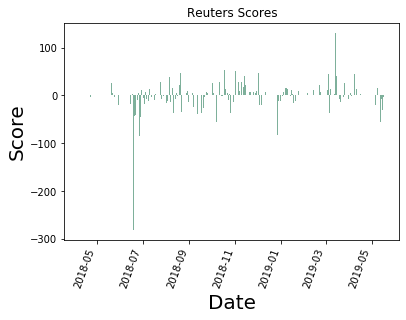

In [26]:
fig = plt.figure(figsize = (12, 6))
barplot(Rcombined_score.keys(), Rcombined_score.values(), x_label = 'Date', y_label = 'Score', title = 'Reuters Scores')

<Figure size 864x432 with 0 Axes>

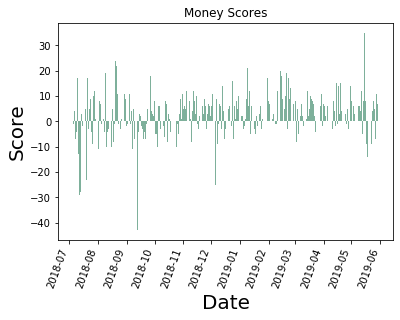

In [27]:
fig = plt.figure(figsize = (12, 6))
barplot(Mcombined_score.keys(), Mcombined_score.values(), x_label = 'Date', y_label = 'Score', title = 'Money Scores')

<Figure size 864x432 with 0 Axes>

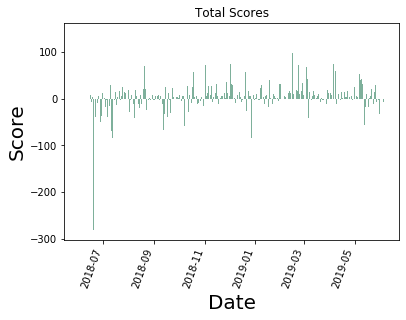

In [40]:
fig = plt.figure(figsize = (12, 6))
barplot(Big_combined_score.keys(), Big_combined_score.values(), x_label = 'Date', y_label = 'Score', title = 'Total Scores')

In [41]:
import csv

with open('Total_score.csv', 'w') as f:
    w = csv.writer(f)
    w.writerow(['Date', 'Score'])
    w.writerows(Big_combined_score.items())

In [42]:
import pickle

file = open('Total_score.pickle', 'wb')
pickle.dump(Big_combined_score, file)
file.close()